In [2]:
!pip install tensorflow xgboost numpy matplotlib scikit-learn opencv-python pillow seaborn pandas setuptools openpyxl


In [3]:

# some basic libraries
import xgboost
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# importing for basic image operations
import cv2 as cv
from PIL import Image
from PIL import ImageOps
import seaborn as sns
import pandas as pd
import os

# data structures
from collections import OrderedDict

# importing pretrained models
from tensorflow.keras.applications import efficientnet

# for splitting data
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# prerequisites for training models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# for selecting better metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# initialize TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)  # Atualização aqui
except:
    strategy = tf.distribute.get_strategy()

print(f"Strategy: {strategy}")


Strategy: <tensorflow.python.distribute.distribute_lib._DefaultDistributionStrategy object at 0x000001650B435C70>


In [4]:
# variables to change

TRAIN_IMG_DIR_PATH = "../imagens_bd/results_train"
TEST_IMG_DIR_PATH = "../imagens_bd/results_test" 
TRAIN_SC_DIR_PATH = "../imagens_bd/train-resized"
TEST_SC_DIR_PATH = "../imagens_bd/test-resized"
model_path = "../modelo"
#classes = ["residential", "mixed", "commercial","others","industrial"]
classes = ["residential", "commercial","others","industrial"]

INPUT_IMG_WIDTH = 250
INPUT_IMG_HEIGHT = 350
VERTICAL = True

Carregando modelos 25 epocas

In [10]:
new_eff_model = tf.keras.models.load_model(model_path + '/' + 'modelo_att_2(25e).keras')

Carregando modelos 100 epocas

In [5]:
new_eff_model = tf.keras.models.load_model(model_path + '/' + 'modelo_att(100e).keras')

In [6]:
new_eff_model.load_weights(model_path + '/' + 'modelo_att.weights.h5')

In [7]:
#@title
target_class = "residential"
residential_prediction_mapping = OrderedDict()

with strategy.scope():

  for file_name in os.listdir(TEST_IMG_DIR_PATH + '/' + target_class):

    img = Image.open(TEST_IMG_DIR_PATH + '/' + target_class + '/'+ file_name)
    building_image = np.array(ImageOps.fit(img,(250, 350), Image.LANCZOS))
    building_image = np.expand_dims(building_image, axis = 0)
    residential_prediction_mapping[target_class + '/'+ file_name] = new_eff_model.predict(building_image)

target_class = "commercial"
commercial_prediction_mapping = OrderedDict()
with strategy.scope():

  for file_name in os.listdir(TEST_IMG_DIR_PATH + '/' + target_class):
    img = Image.open(TEST_IMG_DIR_PATH + '/' + target_class + '/'+ file_name)
    building_image = np.array(ImageOps.fit(img,(250, 350), Image.LANCZOS))
    building_image = np.expand_dims(building_image, axis = 0)
    commercial_prediction_mapping[target_class + '/'+ file_name] = new_eff_model.predict(building_image)

target_class = "industrial"
industrial_prediction_mapping = OrderedDict()
with strategy.scope():

  for file_name in os.listdir(TEST_IMG_DIR_PATH + '/' + target_class):
    img = Image.open(TEST_IMG_DIR_PATH + '/' + target_class + '/'+ file_name)
    building_image = np.array(ImageOps.fit(img,(250, 350), Image.LANCZOS))
    building_image = np.expand_dims(building_image, axis = 0)
    industrial_prediction_mapping[target_class + '/'+ file_name] = new_eff_model.predict(building_image)

target_class = "others"
others_prediction_mapping = OrderedDict()
with strategy.scope():

  for file_name in os.listdir(TEST_IMG_DIR_PATH + '/' + target_class):

    img = Image.open(TEST_IMG_DIR_PATH + '/' + target_class + '/'+ file_name)
    building_image = np.array(ImageOps.fit(img,(250, 350), Image.LANCZOS))
    building_image = np.expand_dims(building_image, axis = 0)
    others_prediction_mapping[file_name] = new_eff_model.predict(building_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [8]:
#@title
others_predictions = OrderedDict()

for file_name in others_prediction_mapping.keys():
  # others_predictions[file_name] = np.argmax(others_prediction_mapping[file_name], axis = 1)[0]
  others_predictions[file_name] = others_prediction_mapping[file_name]

others_scene_predictions = OrderedDict()
for file_name in others_predictions.keys():
  scene_file_name = '_'.join(os.path.splitext(file_name)[0].split('_')[-3:]) + os.path.splitext(file_name)[1]
  if scene_file_name not in others_scene_predictions.keys():
    others_scene_predictions[scene_file_name] = [others_predictions[file_name]]
  else:
    others_scene_predictions[scene_file_name].append(others_predictions[file_name])

residential_predictions = OrderedDict()
for file_name in residential_prediction_mapping.keys():
  # residential_predictions[file_name] = np.argmax(residential_prediction_mapping[file_name], axis = 1)[0]

  residential_predictions[file_name] = residential_prediction_mapping[file_name]

residential_scene_predictions = OrderedDict()
for file_name in residential_predictions.keys():
  scene_file_name = '_'.join(os.path.splitext(file_name)[0].split('_')[-3:]) + os.path.splitext(file_name)[1]
  if scene_file_name not in residential_scene_predictions.keys():
    residential_scene_predictions[scene_file_name] = [residential_predictions[file_name]]
  else:
    residential_scene_predictions[scene_file_name].append(residential_predictions[file_name])

commercial_predictions = OrderedDict()
for file_name in commercial_prediction_mapping.keys():
  # commercial_predictions[file_name] = np.argmax(commercial_prediction_mapping[file_name], axis = 1)[0]

  commercial_predictions[file_name] = commercial_prediction_mapping[file_name]
commercial_scene_predictions = OrderedDict()
for file_name in commercial_predictions.keys():
  scene_file_name = '_'.join(os.path.splitext(file_name)[0].split('_')[-3:]) + os.path.splitext(file_name)[1]
  if scene_file_name not in commercial_scene_predictions.keys():
    commercial_scene_predictions[scene_file_name] = [commercial_predictions[file_name]]
  else:
    commercial_scene_predictions[scene_file_name].append(commercial_predictions[file_name])

industrial_predictions = OrderedDict()
for file_name in industrial_prediction_mapping.keys():
  # industrial_predictions[file_name] = np.argmax(industrial_prediction_mapping[file_name], axis = 1)[0]

  industrial_predictions[file_name] = industrial_prediction_mapping[file_name]
industrial_scene_predictions = OrderedDict()
for file_name in industrial_predictions.keys():
  scene_file_name = '_'.join(os.path.splitext(file_name)[0].split('_')[-3:]) + os.path.splitext(file_name)[1]
  if scene_file_name not in industrial_scene_predictions.keys():
    industrial_scene_predictions[scene_file_name] = [industrial_predictions[file_name]]
  else:
    industrial_scene_predictions[scene_file_name].append(industrial_predictions[file_name])

 Visualizar Imagens e Previsões

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Function to plot a sample of the images and their predictions
def plot_sample_images(prediction_mapping, target_class, num_samples=10):
    sample_predictions = list(prediction_mapping.items())[:num_samples]
    for file_path, prediction in sample_predictions:
        # Check if the path does not start with any of the known prefixes
        print(file_path)
        if not file_path.startswith(('commercial', 'residential', 'industrial')):
            file_path = 'others/' + file_path

        img = Image.open(TEST_IMG_DIR_PATH + '/' + file_path)
        plt.imshow(img)
        plt.title(f"Prediction: {np.argmax(prediction)}")
        plt.show()


# Plot sample images and their predictions for each class
print("Residential Images and Predictions:")
plot_sample_images(residential_prediction_mapping, "residential")

print("Commercial Images and Predictions:")
plot_sample_images(commercial_prediction_mapping, "commercial")

print("Industrial Images and Predictions:")
plot_sample_images(industrial_prediction_mapping, "industrial")

print("Other Images and Predictions:")
plot_sample_images(others_prediction_mapping, "others")


Exibir as imagens com as porcentagens

Residential Images and Predictions:


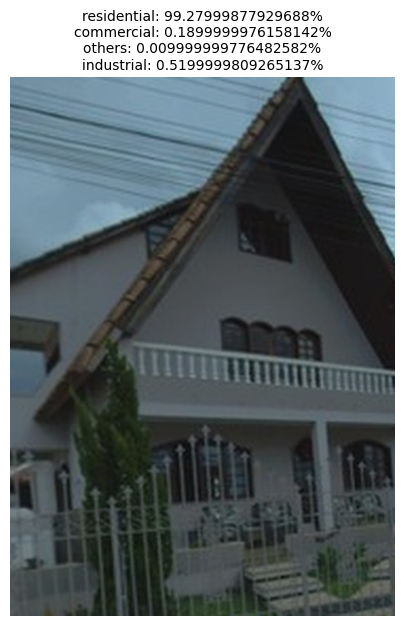

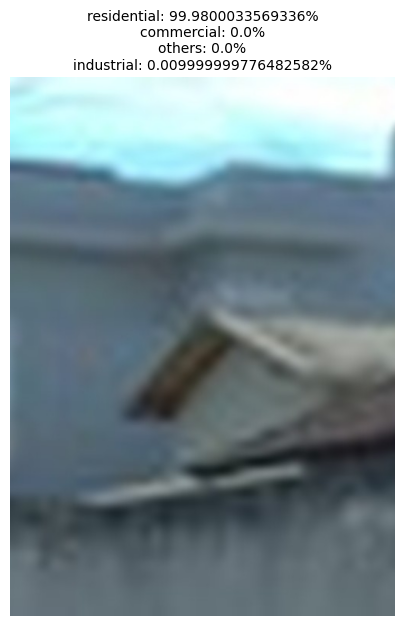

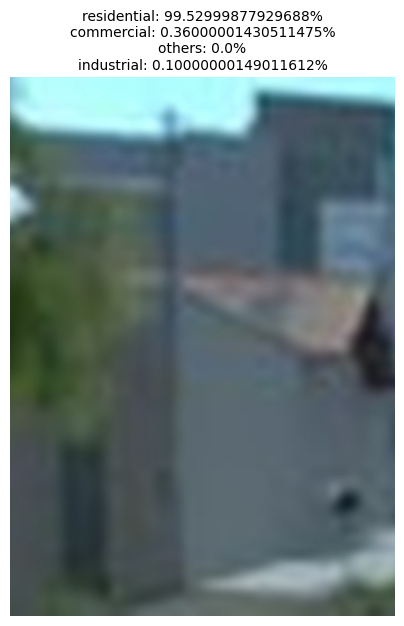

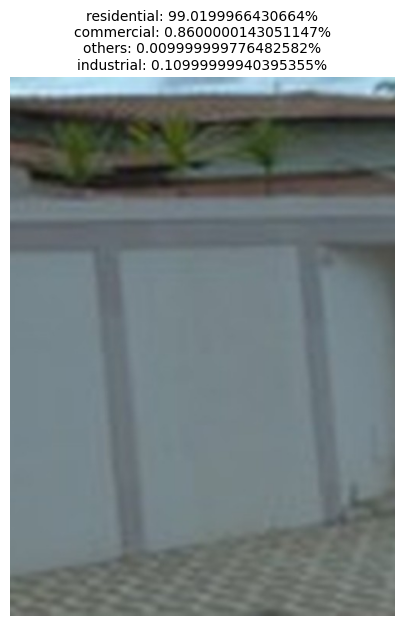

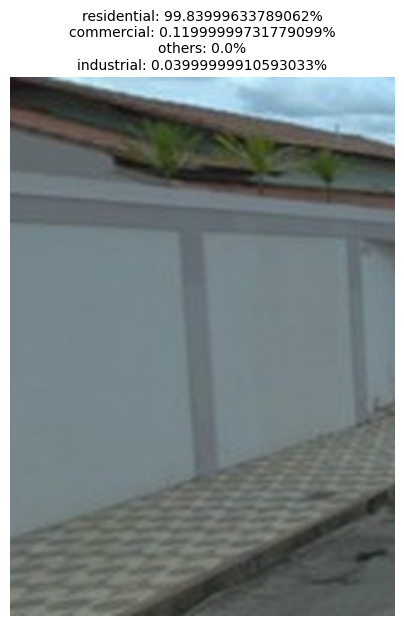

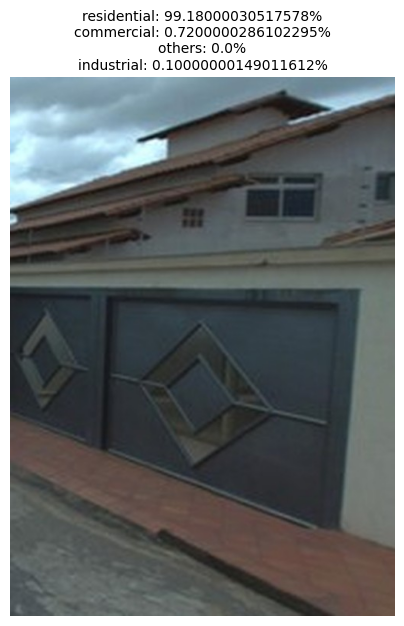

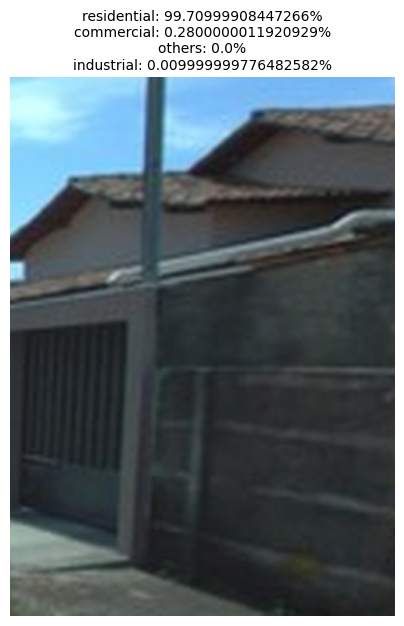

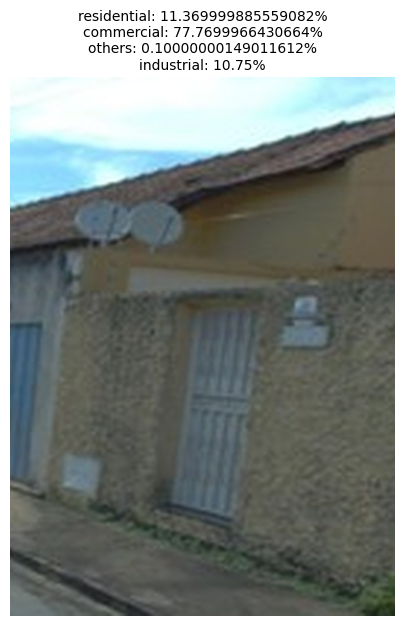

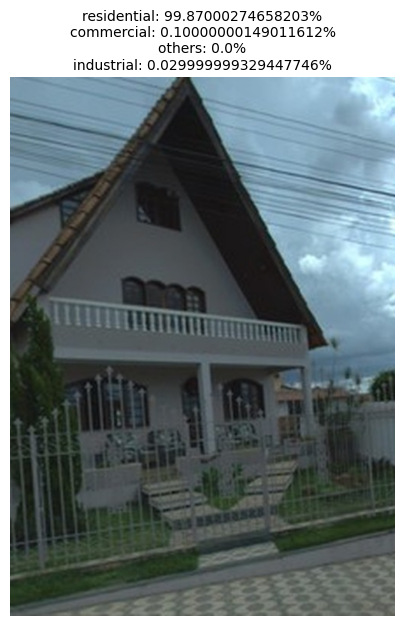

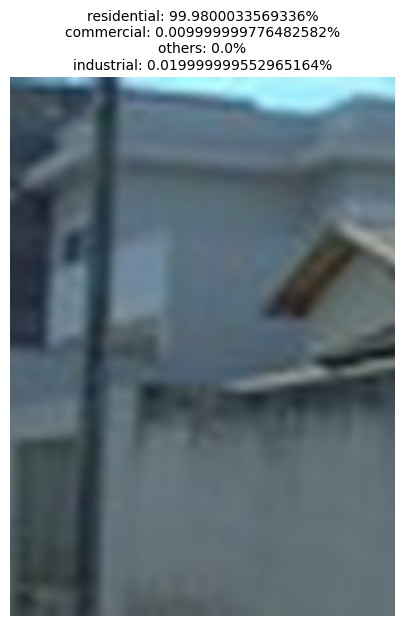

Commercial Images and Predictions:


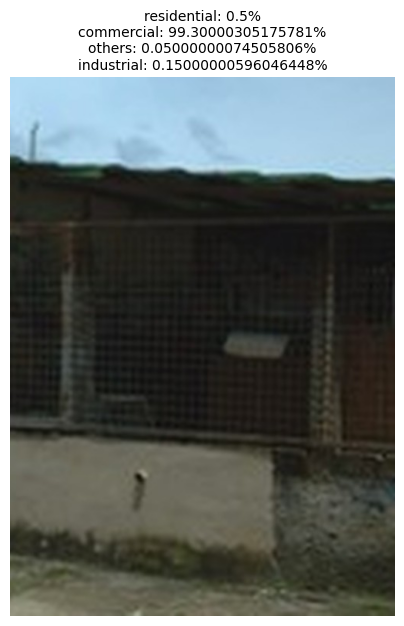

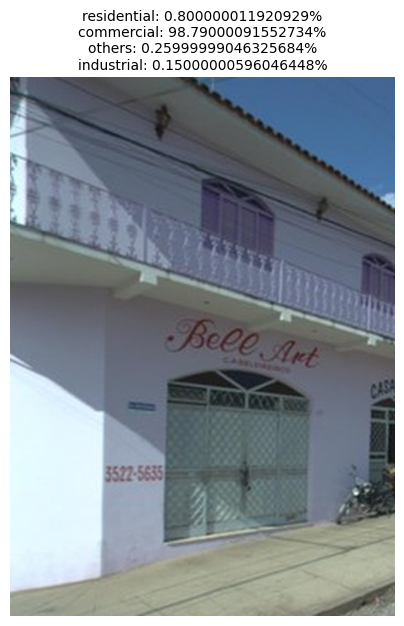

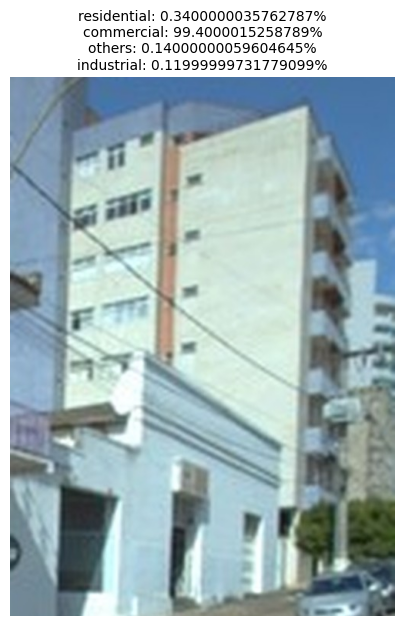

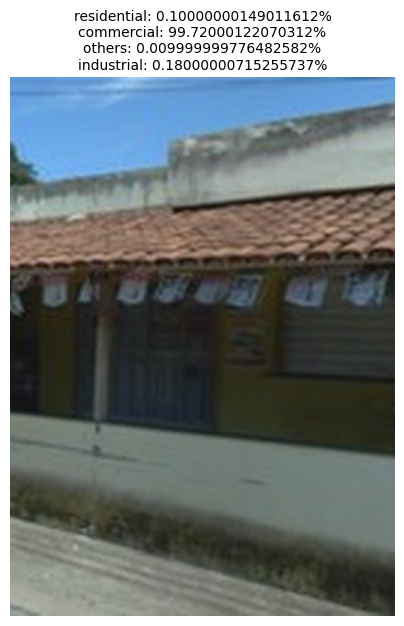

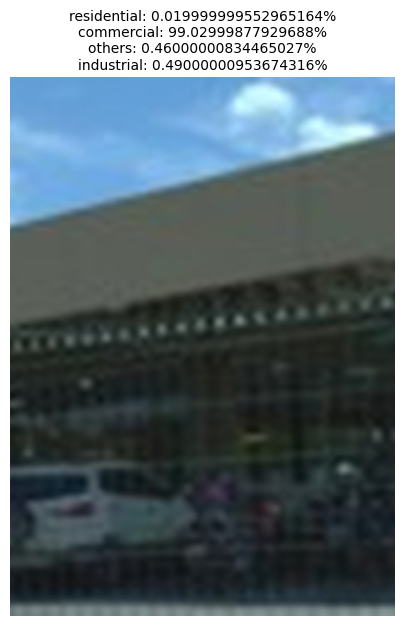

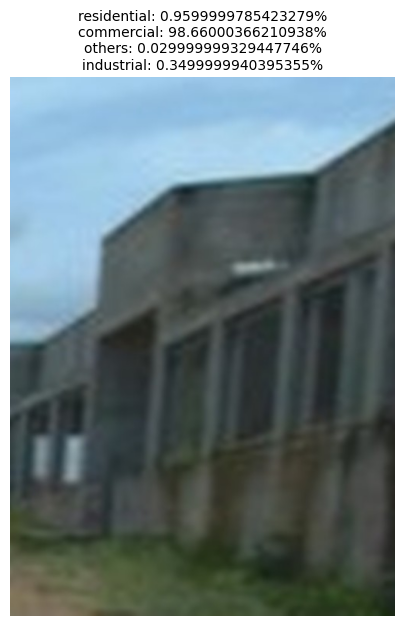

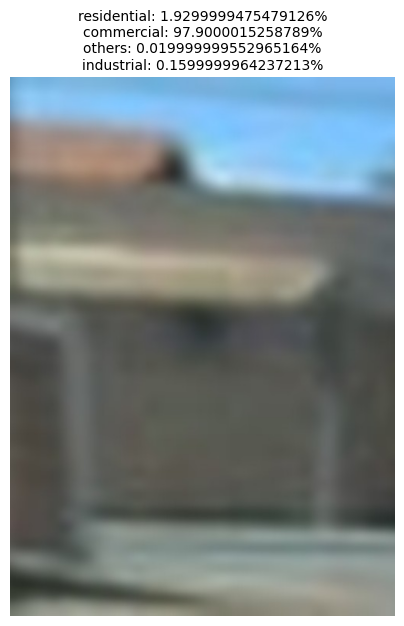

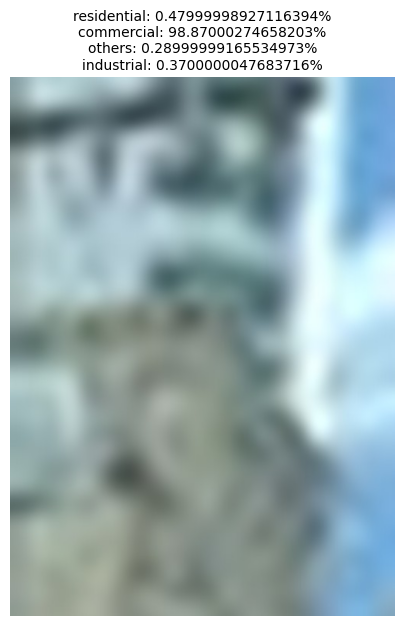

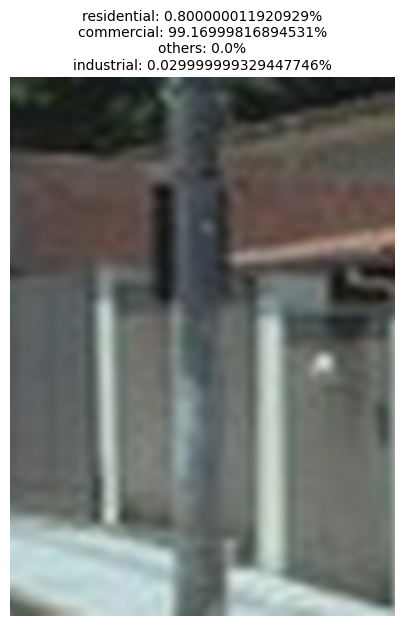

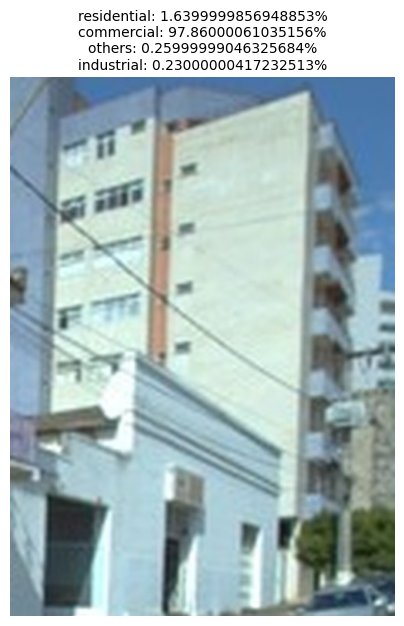

Industrial Images and Predictions:


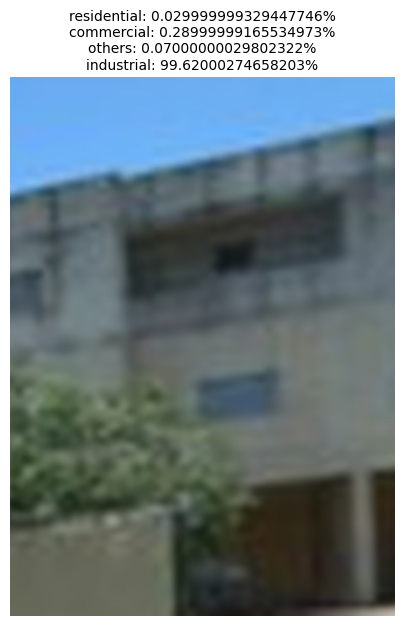

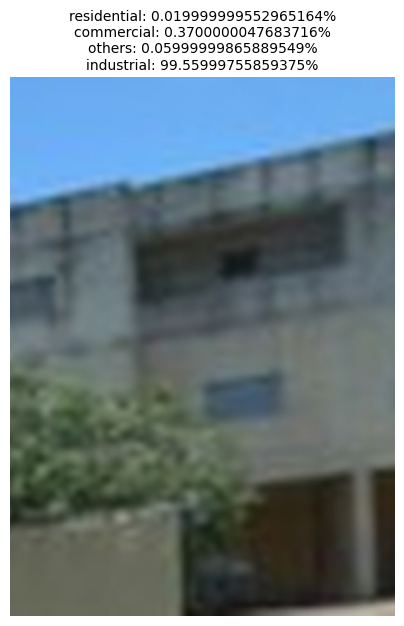

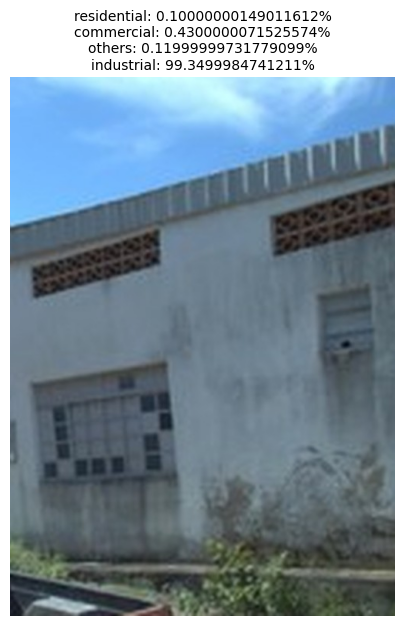

Other Images and Predictions:


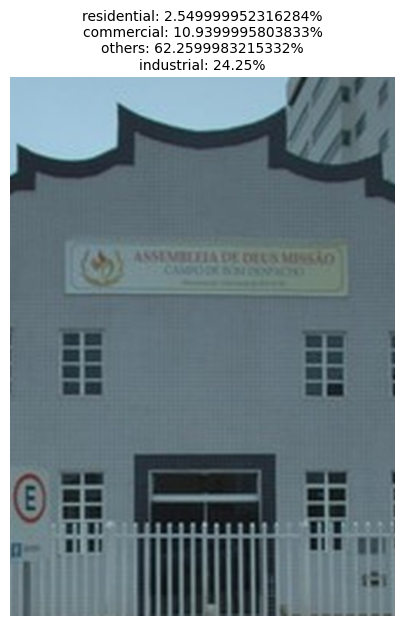

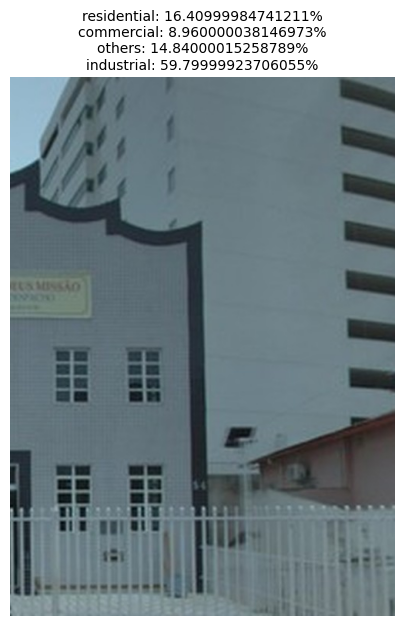

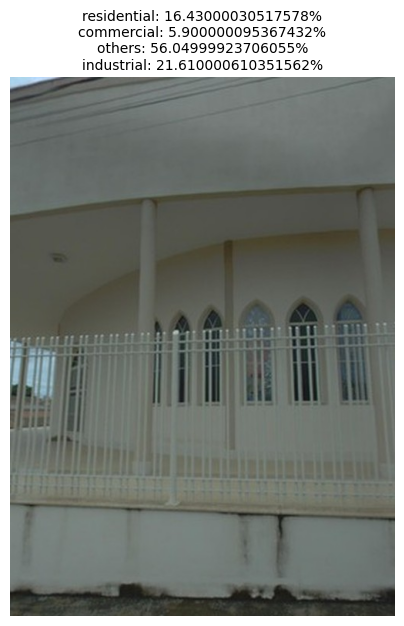

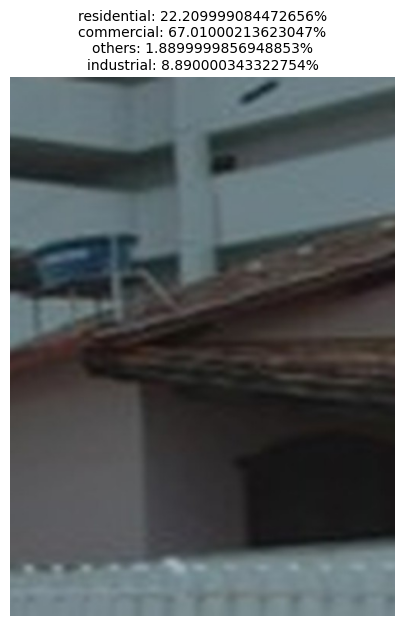

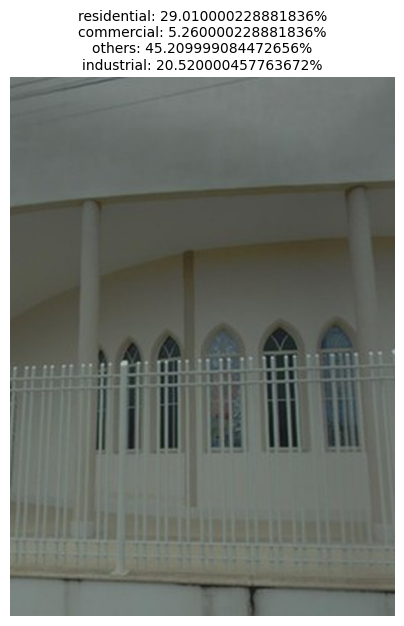

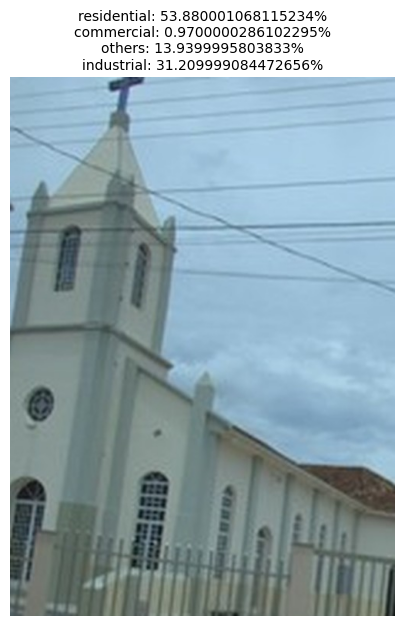

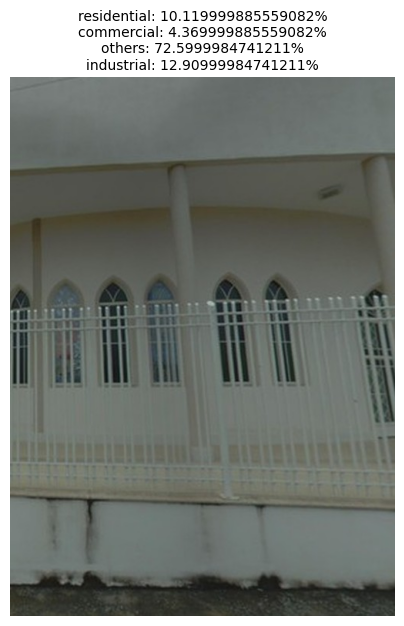

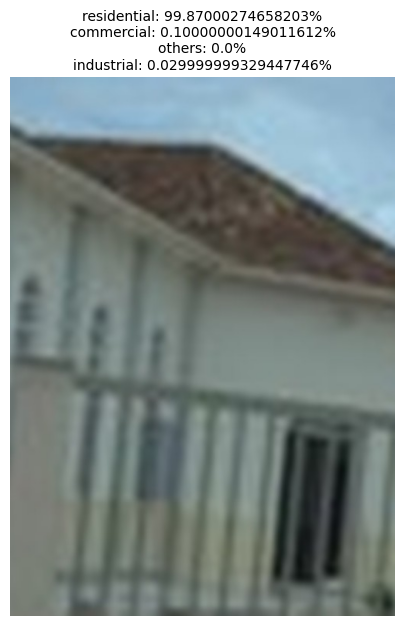

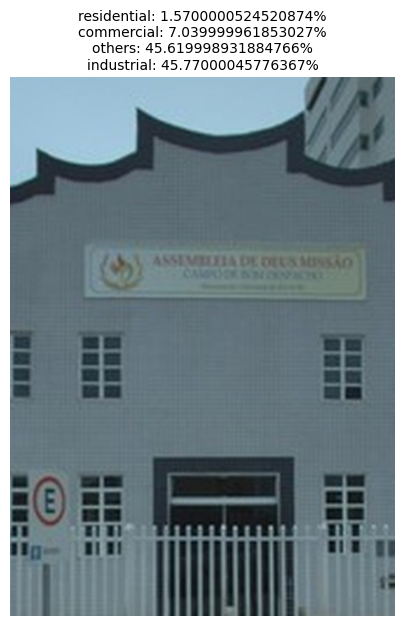

In [10]:
import matplotlib.pyplot as plt
from PIL import Image

# Função para calcular as porcentagens das predições e exibir as imagens
def plot_sample_images_with_percentages(prediction_mapping, target_class, num_samples=10):
    sample_predictions = list(prediction_mapping.items())[:num_samples]

    for file_path, prediction in sample_predictions:
        # Ajustar o caminho do arquivo para a categoria "others", se necessário
        if not file_path.startswith(('commercial', 'residential', 'industrial')):
            file_path = 'others/' + file_path

        # Carregar a imagem
        img = Image.open(TEST_IMG_DIR_PATH + '/' + file_path)

        # Calcular as porcentagens para cada classe
        percentages = {cls: round(prob * 100, 2) for cls, prob in zip(classes, prediction[0])}

        # Criar um título com as porcentagens das predições
        title = "\n".join([f"{cls}: {percent}%" for cls, percent in percentages.items()])

        # Exibir a imagem com o título
        plt.figure(figsize=(5, 7))
        plt.imshow(img)
        plt.axis('off')
        plt.title(title, fontsize=10)
        plt.show()

# Plotando as imagens e suas predições para cada classe
print("Residential Images and Predictions:")
plot_sample_images_with_percentages(residential_prediction_mapping, "residential")

print("Commercial Images and Predictions:")
plot_sample_images_with_percentages(commercial_prediction_mapping, "commercial")

print("Industrial Images and Predictions:")
plot_sample_images_with_percentages(industrial_prediction_mapping, "industrial")

print("Other Images and Predictions:")
plot_sample_images_with_percentages(others_prediction_mapping, "others")


Exportar as tabelas

In [11]:
import pandas as pd

def get_predictions_with_percentages(image_dir, target_class, model, classes):
    prediction_mapping = OrderedDict()

    for file_name in os.listdir(image_dir + '/' + target_class):
        img = Image.open(image_dir + '/' + target_class + '/' + file_name)
        building_image = np.array(ImageOps.fit(img, (INPUT_IMG_WIDTH, INPUT_IMG_HEIGHT), Image.LANCZOS))
        building_image = np.expand_dims(building_image, axis=0)
        prediction = model.predict(building_image)[0]  # Obter o vetor de probabilidades
        percentages = {cls: f"{round(prob * 100, 2)}%" for cls, prob in zip(classes, prediction)}
        prediction_mapping[file_name] = percentages

    return prediction_mapping

# Gera predições para todas as classes
all_predictions = {}
for target_class in classes:
    predictions = get_predictions_with_percentages(TEST_IMG_DIR_PATH, target_class, new_eff_model, classes)
    all_predictions[target_class] = predictions

# Criar uma tabela visual
def create_prediction_table(predictions_dict):
    all_data = []
    for target_class, predictions in predictions_dict.items():
        for file_name, percentages in predictions.items():
            row = {"Image": file_name, "True Class": target_class, **percentages}
            all_data.append(row)
    
    return pd.DataFrame(all_data)

# Cria tabela consolidada
prediction_table = create_prediction_table(all_predictions)

# Salva a tabela em um arquivo Excel
output_path = "prediction_percentages_table.xlsx"
prediction_table.to_excel(output_path, index=False)

print(f"A tabela foi salva em: {output_path}")

# Exibe a tabela diretamente no console
print(prediction_table)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Exportar as tabelas com as imagens

In [12]:
import openpyxl
from openpyxl.drawing.image import Image as OpenPyxlImage
import os

def save_predictions_with_images_to_excel(predictions_dict, image_dir, output_path, classes):
    # Cria uma pasta temporária para salvar as imagens
    temp_image_dir = "temp_images"
    os.makedirs(temp_image_dir, exist_ok=True)

    # Cria uma nova planilha Excel
    wb = openpyxl.Workbook()
    ws = wb.active
    ws.title = "Predictions"

    # Cabeçalhos
    headers = ["Image", "True Class", "Image Path"] + classes
    ws.append(headers)

    # Adiciona as predições e imagens à planilha
    row_index = 2
    for target_class, predictions in predictions_dict.items():
        for file_name, percentages in predictions.items():
            # Salvar a imagem temporariamente
            img_path = os.path.join(image_dir, target_class, file_name)
            temp_img_path = os.path.join(temp_image_dir, file_name)
            img = Image.open(img_path)
            img.save(temp_img_path)

            # Adiciona as informações à planilha
            row = [file_name, target_class, temp_img_path] + [percentages[cls] for cls in classes]
            ws.append(row)

            # Insere a imagem na célula correspondente
            img_openpyxl = OpenPyxlImage(temp_img_path)
            ws.add_image(img_openpyxl, f"C{row_index}")

            row_index += 1

    # Salva a planilha
    wb.save(output_path)

    # Remove as imagens temporárias
    for temp_file in os.listdir(temp_image_dir):
        os.remove(os.path.join(temp_image_dir, temp_file))
    os.rmdir(temp_image_dir)

    print(f"Predictions with images saved to: {output_path}")

# Gera a tabela com as predições e imagens
output_excel_path = "predictions_with_images.xlsx"
save_predictions_with_images_to_excel(all_predictions, TEST_IMG_DIR_PATH, output_excel_path, classes)


Predictions with images saved to: predictions_with_images.xlsx


In [13]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)
import numpy as np

# Função para calcular métricas
def calculate_metrics(y_true, y_pred, y_prob, class_names):
    metrics = {}

    # Acurácia
    metrics['accuracy'] = accuracy_score(y_true, y_pred)

    # Precisão, Recall, F1-Score
    metrics['precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['f1_score'] = f1_score(y_true, y_pred, average='weighted')

    # Matriz de Confusão
    cm = confusion_matrix(y_true, y_pred)
    metrics['confusion_matrix'] = cm

    # Relatório de Classificação
    metrics['classification_report'] = classification_report(y_true, y_pred, target_names=class_names)

    # AUC-ROC (se y_prob estiver disponível)
    if y_prob is not None:
        metrics['roc_auc'] = roc_auc_score(y_true, y_prob, multi_class='ovr', average='weighted')

    return metrics

# Preparando os dados para cálculo
def prepare_data_for_metrics(prediction_mapping, target_class_index):
    y_true = []
    y_pred = []
    y_prob = []

    for file_name, predictions in prediction_mapping.items():
        y_true.append(target_class_index)  # Classe verdadeira
        y_pred.append(np.argmax(predictions))  # Classe predita
        y_prob.append(predictions[0])  # Vetor de probabilidades

    return y_true, y_pred, y_prob

# Consolida os dados de todas as classes
y_true_all, y_pred_all, y_prob_all = [], [], []

for idx, target_class in enumerate(classes):
    y_true, y_pred, y_prob = prepare_data_for_metrics(
        locals()[f"{target_class}_prediction_mapping"], idx
    )
    y_true_all.extend(y_true)
    y_pred_all.extend(y_pred)
    y_prob_all.extend(y_prob)

# Calcula as métricas
metrics = calculate_metrics(y_true_all, y_pred_all, y_prob_all, classes)

# Exibindo as métricas
print("Acurácia:", metrics['accuracy'])
print("\nPrecisão:", metrics['precision'])
print("\nRecall:", metrics['recall'])
print("\nF1-Score:", metrics['f1_score'])
print("\nMatriz de Confusão:\n", metrics['confusion_matrix'])
print("\nRelatório de Classificação:\n", metrics['classification_report'])

if 'roc_auc' in metrics:
    print("\nAUC-ROC:", metrics['roc_auc'])


Acurácia: 0.8378378378378378

Precisão: 0.8718468468468469

Recall: 0.8378378378378378

F1-Score: 0.8223718304363467

Matriz de Confusão:
 [[14  1  0  0]
 [ 0 10  0  0]
 [ 2  1  4  2]
 [ 0  0  0  3]]

Relatório de Classificação:
               precision    recall  f1-score   support

 residential       0.88      0.93      0.90        15
  commercial       0.83      1.00      0.91        10
      others       1.00      0.44      0.62         9
  industrial       0.60      1.00      0.75         3

    accuracy                           0.84        37
   macro avg       0.83      0.84      0.79        37
weighted avg       0.87      0.84      0.82        37


AUC-ROC: 0.9603369603369604
